# Lista 9 (9 pkt.)

In [1]:
import numpy as np
import hashlib
import matplotlib.pyplot as plt

In [2]:
from ipynb.fs.full.Lista3 import xor, DES, key_schedule
from ipynb.fs.full.Lista4 import add_GF
from ipynb.fs.full.Lista5 import hex2bin
from ipynb.fs.full.Lista7 import gcdExtended, enc, dec, key_gen

True
True
True
True
True
True
True
True
True
True
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True  True  True]
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
('1111011', '1')
('11110110', '1')
True
True
True
True
True
True
True
True
True
True
True
True
wrong: 0
True
True
True
True
True
True
True
True
True
True
True
True
6 8
13 13 True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


## Zadanie 1 (1 pkt.)

Wczytaj dwa obrazki: 'Campin_Boze_Narodzenie1.png' oraz 'Campin_Boze_Narodzenie2.png' jeden z nich jest zgodny z oryginałem obrazu Roberta Campin a drugi jest lekko zmodyfikowany, rozponaj prawdziwy obraz obliczając jego funkcję skrótu SHA-256 i porównując ją do skrótu podanego poniżej (w postaci szesnastkowej), który odpowiada oryginałowi:

In [3]:
hash_original='2d08246bbb3a8f6b0c16b8d8effd2c783233a6a174496731dfff887bb41bc7e7'

Obrazek wczytaj za pomocą:

In [4]:
file1 = open('Campin_Boze_Narodzenie1.png','rb')
obraz1=file1.read()
file1.close()

In [5]:
file2 = open('Campin_Boze_Narodzenie2.png','rb')
obraz2=file2.read()
file2.close()

'rb' w powyższej funkcji oznacza, że odczytujemy binarną postać obrazu. Podobnie wczytaj drugi obraz. Do policzenia funkcji skrótu użyj biblioteki hashlib: https://docs.python.org/3/library/hashlib.html

In [6]:
print(hashlib.sha256(obraz1).hexdigest()==hash_original) # obraz 1

True


In [7]:
print(hashlib.sha256(obraz2).hexdigest()==hash_original)

False


## Zadanie 2 (2 pkt.)

Zaimplementuj funkcję **rho_pollard()** znajdującą kolizje w funkcji skrótu za pomocą agorytmu rho Pollarda. Wypisz przykładowe pary argumentów, które mają taki sam skrót dla funkcji **simple_hash()**, która przyjmuje liczbę zapisaną szesnastkowo w postaci stringu i zwraca hash w postaci stringu z zapisem szesnastkowym.

In [8]:
def rho_pollard(n):
    x=2
    y=2
    d=1
    
    i=0
#     while d==1:
    while i<30:
        x = int(simple_hash(hex(x)),16)
        y = int(simple_hash(simple_hash(hex(y))), 16)
#         print(x, y, abs(x-y), n)
        d,_,_ = gcdExtended(abs(x-y), n)
        i+=1
        if d!=1 and x!=y:
            print(x, y)
        
    if d==n:
        return False
    
#     print(x, y)
    return d

In [9]:
def simple_hash(str):
    m = hashlib.sha256()
    m.update(bytes(int(str,16)))
    return m.hexdigest()[:2]

In [10]:
print(rho_pollard(200))

1 123
110 245
242 150
253 17
64 124
1 123
110 245
242 150
253 17
64 124
1


## Zadanie 3 (2 pkt.)

Napisz funkcję **HMAC(K,M)**, która przyjmuje klucz oraz wiadomość a zwraca kod HMAC, wszystko w postaci stringu bitów. Funkcja **hash()** to funkcja SHA256 ale przyjmująca i zwracająca dane w postaci stringu bitów. Przyjmij długość bloku 64 bity (przypadek DESa).

In [11]:
def HMAC(K,M):
    b=64
    ipad = "00110110" * 8
    opad = "01011100" * 8
    
    Si = xor(K, ipad)
    So = xor(K, opad)
    
    MD_ = hash("".join([Si, M])).zfill(b)
    MD = hash("".join([So, MD_]))

    return MD

In [12]:
def hash(i):
    m = hashlib.sha256()
    m.update(int(i,2).to_bytes(len(i),'little'))
    return format(int(m.hexdigest(),16),'0256b')

In [13]:
print(HMAC('0010111000111100100000001100001000110000100011001110011110010000','0100011001010010011011010100100100011101011101111011010000101010')
    == '1101011010010010001001010001100000001011000100001100101110111010000001000000110000001111011111110101011101111010110111001111001001001010000011110101110101010000100011110100101000111001000111000011111000011111001001110000110001111100110011110010100110000100')
print(HMAC('1000110000100011001111011101000000010001110101110011101011000110','1100110101011010110010110011001001010000000000111000011011000011')
    == '0100010101000110011101000100111010101111011110001010001001011000010001011100010100000000010010110000100010010101011011000010111000001110000101100011101100111111001000101101110011101100001111000000011111011111100001010111010011010010101100010101011100111010')
print(HMAC('0010100101111010101111100000101110110001011111100101000010001010','1110001110111101101100001010001110011101011111101010110011000000')
    == '1101010101011101110011000000111100111100100100011001011000001011101001100011011011010100110100010110101100000011010100000100111100111111100001110100000100100111100011111011000110101010000101110001110111101110011001000010001001001010010011000000111000011111')

True
True
True


Zmienne **msg_enc1** oraz **msg_enc2** zawierają dwie wiadomości. Jedna z nich jest poprawna druga ma zmieniony jeden bit. Wiemy, że wiadomośc zaszyfrowano za pomocą DESa z kluczem **key** i nadawca dodał do niej kod HMAC zawarty w zmiennej $hmac$. Sprawdź, która z otrzymanych wiadomości jest poprawna.

In [14]:
msg_enc1 = '0110011010100110101010011000011111010000110111011011110110110101'
msg_enc2 = '0110011010100110101010011000011111010000110111010011110110110101'
key = '0001101100001110010010101101001101101010000100100000100001101100'

In [15]:
hmac = '1010011101011000110010101011100100001001110111010000110100110111001001110010001101001010000011010001001101010100000010100111110010101011001101001010101100110110000101101110100000010001101011011011110011110111011100110000011010110001110000011000011100101001'

In [16]:
HMAC(key, msg_enc1) == hmac

True

In [17]:
HMAC(key, msg_enc2) == hmac

False

## Zadanie 4 (2 pkt.)

Napisz funkcję **sign(file_name, e, n)** generującą podpis elektroniczny pliku, gdzie **file_name** to nazwa pliku, $e$ i $n$ to klucz prywatny algorymtu RSA, oznaczenia jak na liście 7., funkcja ma zwracać podpis w postaci stringu z zapisem szesnastkowym.

In [18]:
def sign(file_name, e, n):
    file = open(file_name,'rb')
    data = file.read()
    file.close()
    
    hash_val = hashlib.sha256(data).hexdigest()
    result = enc(int(hash_val,16), e, n)
    return f'{result:0x}' #na zapis hex

Napisz funkcję **check_sign(file_name, d, n, sign)** weryfikującą autentyczność podpisu, gdzie **file_name** to nazwa pliku $d$ i $n$ to klucz publiczny autora podpisu a $sign$ to podpis, funkcja ma zwracać **True** lub **False**.

In [19]:
def check_sign(file_name, d, n, sign):
    file = open(file_name, 'rb')
    data = file.read()
    data_hex = data.hex()
    file.close()
    
    hash_val = hashlib.sha256(data).hexdigest()
    dec_val = dec(int(sign,16), d, n)
    return hash_val == f'{dec_val:0x}'

Wygeneruj klucze RSA z liczb pierwszych $p$ i $q$ i użyj ich w testach.

In [20]:
p=24130780476900131841553779066939443255102203937160657723394451174808141403858935238883126295228560935516885174421847238379397184900972008801015315248328437
q=26660613491521684005574100352062919789979599401844483402246984186988668019447679726081352452799126206997555710356464145743285983450292024894053538317854159

In [21]:
n, e, d = key_gen(p, q)

In [22]:
print(sign('correlation.png',e,n)=='1d5e7cd47f75b13159a37c8ffb3ba7d9f43a21f4758ae06e856da0a468fd1772f7b8b52d0f948fd02610e0e05a54c0fff12d7bd27575583cfdf53b124e9c0e95df1de156aa0af52239f1329ab69000b4a6a61d3d45f190c4b9df4ca4b7d30904162727353a8fb09c9faf847eeb0f6f65394d92cb57ced2cdcff36c444394e3fff')
print(sign('Campin_Boze_Narodzenie1.png',e,n)=='1c6097177871bb4873fcd0ae658d28f46fcc54e4b0e595954a57c0008f8b86c7427cecf28296240025941fe2a019b80fcc5f43c4cae6b1d2163cecf8438336d3da6e33ae326dfa2c0e5ea7bbad511dd140bc7b0cd34829623bfd02bc66bc9b43d57443b7fd950bea5cb5f5df99d8611eeb0d4458b19809e3ff86abf6538c3e453')

True
True


In [23]:
print(check_sign('correlation.png',d,n,'1d5e7cd47f75b13159a37c8ffb3ba7d9f43a21f4758ae06e856da0a468fd1772f7b8b52d0f948fd02610e0e05a54c0fff12d7bd27575583cfdf53b124e9c0e95df1de156aa0af52239f1329ab69000b4a6a61d3d45f190c4b9df4ca4b7d30904162727353a8fb09c9faf847eeb0f6f65394d92cb57ced2cdcff36c444394e3fff')==True)
print(check_sign('correlation.png',d,n,'1d5e7cd47f75b13159a37c8ffb3ba7d9f43a21f4758ae06e856ba0a468fd1772f7b8b52d0f948fd02610e0e05a54c0fff12d7bd27575583cfdf53b124e9c0e95df1de156aa0af52239f1329ab69000b4a6a61d3d45f190c4b9df4ca4b7d30904162727353a8fb09c9faf847eeb0f6f65394d92cb57ced2cdcff36c444394e3fff')==False)
print(check_sign('Campin_Boze_Narodzenie1.png',d,n,'1c6097177871bb4873fcd0ae658d28f46fcc54e4b0e595954a57c0008f8b86c7427cecf28296240025941fe2a019b80fcc5f43c4cae6b1d2163cecf8438336d3da6e33ae326dfa2c0e5ea7bbad511dd140bc7b0cd34829623bfd02bc66bc9b43d57443b7fd950bea5cb5f5df99d8611eeb0d4458b19809e3ff86abf6538c3e453')==True)
print(check_sign('Campin_Boze_Narodzenie1.png',d,n,'1c6097177871bb4873fcd0ae658d28f46fec54e4b0e595954a57c0008f8b86c7427cecf28296240025941fe2a019b80fcc5f43c4cae6b1d2163cecf8438336d3da6e33ae326dfa2c0e5ea7bbad511dd140bc7b0cd34829623bfd02bc66bc9b43d57443b7fd950bea5cb5f5df99d8611eeb0d4458b19809e3ff86abf6538c3e453')==False)

True
True
True
True


## Zadanie 5 (2 pkt.)

"Kopanie" Bitcoina polega w uproszczeniu na szukaniu liczby dla której funkcja skrótu zwraca wartość mniejszą niż pewien próg, tzn. wartośc funkcji skrótu musi zaczynać się odpowiednią liczbą zer w zapisie bitowym. Jako, że funkcja skrótu ma właściwości pseudolosowe, szukamy tej liczby sprawdzając po kolei wszystkie liczby. Napisz funkcję **mine(d)**, szukającą takiej liczby $i$ dla której **SHA256(i)** zaczyna się w zapisie bitowym $d$ zerami. Podstawiaj kolejno liczby $0,1,2,3,...$. Funkcja ma zwracać liczbę dla której udało się spełnić warunek.

Uwaga: aby podać zmienną typu **int** jako argument do hashlib.sha256() należy przekonwerstować ją za pomocą **bytes()**

In [24]:
def mine(diff, rand=False):
    begining = '0' * diff + '1'

    x = 0
    if rand:
      x = np.random.randint(0, high=diff**4 + 2)
    x_hash = hashlib.sha256( bytes(x) ).hexdigest()
    b = hex2bin( x_hash, len(x_hash)*4 )

    print(x, b[0:diff], begining, b[0:diff] == begining)
    
    while b[0:diff+1] != begining:
        x += 1
        if rand:
          x = np.random.randint(0, high=diff**4 + 2)
        
        x_hash = hashlib.sha256( bytes(x) ).hexdigest()
        b = hex2bin( x_hash, len(x_hash)*4 )
        
        while x > 10**6:
            x = np.random.randint(0, high=diff**6 + 2)
            # raise ArithmeticError('Too big to calculate')
          
    print("diff=", diff, "x=", x, "b[0:diff]=", b[0:diff])
    return(x)

Wykonaj funkcję **mine(d)** dla kilkunastu wartości $d$ i narysuj wykres **plt.scatter()** zależności **i(d)**.

Uwaga: użyj skali logarytmicznej **plt.yscale('symlog')**.

Zastanów się ile teoretycznie (średnio) należy wykonać prób aby znaleźć funkcję skrótu z $d$ zerami na początku. Narysuj na wykresie linię obrazującą tą zależność i porównaj z punktami uzyskanymi z funkcji **mine()**.

In [25]:
x = []
y = []

for diff in range(16):
    val = mine(diff)
    x.append(diff)
    y.append(val)

0  1 False
diff= 0 x= 0 b[0:diff]= 
0 1 01 False
diff= 1 x= 1 b[0:diff]= 0
0 11 001 False
diff= 2 x= 9 b[0:diff]= 00
0 111 0001 False
diff= 3 x= 12 b[0:diff]= 000
0 1110 00001 False
diff= 4 x= 17 b[0:diff]= 0000
0 11100 000001 False
diff= 5 x= 30 b[0:diff]= 00000
0 111000 0000001 False
diff= 6 x= 55 b[0:diff]= 000000
0 1110001 00000001 False
diff= 7 x= 10 b[0:diff]= 0000000
0 11100011 000000001 False
diff= 8 x= 83 b[0:diff]= 00000000
0 111000111 0000000001 False
diff= 9 x= 621 b[0:diff]= 000000000
0 1110001110 00000000001 False
diff= 10 x= 2202 b[0:diff]= 0000000000
0 11100011101 000000000001 False
diff= 11 x= 1083 b[0:diff]= 00000000000
0 111000111011 0000000000001 False
diff= 12 x= 3692 b[0:diff]= 000000000000
0 1110001110110 00000000000001 False
diff= 13 x= 15212 b[0:diff]= 0000000000000
0 11100011101100 000000000000001 False
diff= 14 x= 30979 b[0:diff]= 00000000000000
0 111000111011000 0000000000000001 False
diff= 15 x= 4117 b[0:diff]= 000000000000000


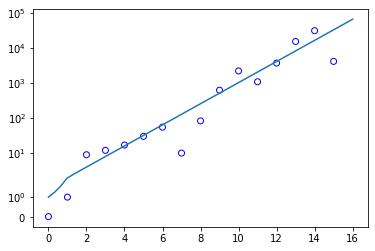

In [26]:
plt.yscale('symlog')
plt.scatter(x, y, facecolors='none', edgecolors='b')
z = np.linspace(0,16);
plt.plot(z, 2**z)
plt.show()

Powtórz pomiary, ale zamiast brać kolejne liczby, bierz losowe. Sprawdź czy daje to lepsze rezultaty.

0  1 False
diff= 0 x= 0 b[0:diff]= 
2 1 01 False
diff= 1 x= 1 b[0:diff]= 0
12 00 001 False
diff= 2 x= 9 b[0:diff]= 00
19 110 0001 False
diff= 3 x= 47 b[0:diff]= 000
167 0000 00001 False
diff= 4 x= 167 b[0:diff]= 0000
432 00011 000001 False
diff= 5 x= 404 b[0:diff]= 00000
981 111110 0000001 False
diff= 6 x= 55 b[0:diff]= 000000
578 1011100 00000001 False
diff= 7 x= 1126 b[0:diff]= 0000000
1280 10111111 000000001 False
diff= 8 x= 1586 b[0:diff]= 00000000
818 111000001 0000000001 False
diff= 9 x= 1929 b[0:diff]= 000000000
7631 1100010110 00000000001 False
diff= 10 x= 6016 b[0:diff]= 0000000000
8559 11101110111 000000000001 False
diff= 11 x= 11069 b[0:diff]= 00000000000
6290 010001101101 0000000000001 False
diff= 12 x= 3692 b[0:diff]= 000000000000
10071 1010111101011 00000000000001 False
diff= 13 x= 23280 b[0:diff]= 0000000000000
37982 00000101000011 000000000000001 False
diff= 14 x= 30979 b[0:diff]= 00000000000000
48461 001101001101010 0000000000000001 False
diff= 15 x= 4117 b[0:diff]= 00

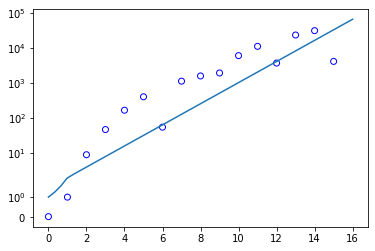

In [27]:
x = []
y = []

for diff in range(16):
    val = mine(diff, rand=True)
    x.append(diff)
    y.append(val)
    
plt.yscale('symlog')
plt.scatter(x, y, facecolors='none', edgecolors='b')

plt.plot(z, 2**z)
plt.show()
